<a href="https://colab.research.google.com/github/YunoGr/portfolioPapeMalick/blob/main/Projet_Statistique_(Groupe_APAB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet de Statistique (Groupe APAB )

# Membres de l'équipe :
L'équipe qui à travaillé sur ce projet en entier est :

* Aissatou GASSAMA (SEM)
* Pape Malick DIOP (IIA)
* Adama SENE (CAA)
* Bineta SY (CAA)

# Professeur :
* Monsieur Lucien GNING

# Exercice 1 : Simulation de lois


Importation des bibliotheques nécessaires pour cet exercice:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

1. ## Loi binomiale $B(30, 0.5)$
Nous simulons un échantillon de taille 10,000 suivant une loi binomiale $B(30, 0.5)$ et traçons l'histogramme.

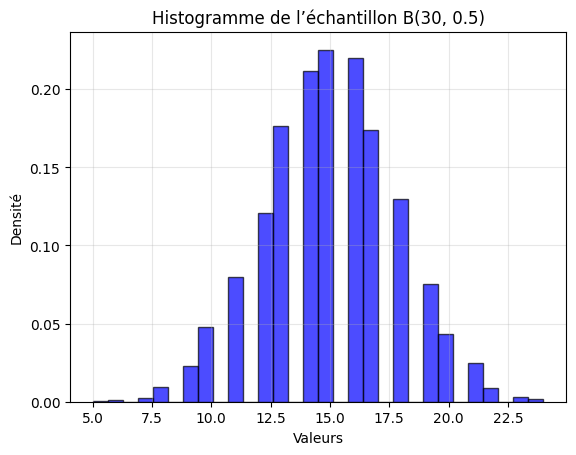

In [ ]:
# Simulation de la loi binomiale B(30, 0.5)
binomial_sample = np.random.binomial(30, 0.5, 10000)
plt.hist(binomial_sample, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title("Histogramme de l’échantillon B(30, 0.5)")
plt.xlabel("Valeurs")
plt.ylabel("Densité")
plt.grid(alpha=0.3)
plt.show()

L'histogramme montre une distribution symétrique, centrée autour de la valeur 15.
Cela correspond à la moyenne théorique
$$
𝐸(𝑋)=𝑛𝑝=30×0.5=15$$

Par ailleurs, les valeurs s'écartent modérément de la moyenne, ce qui est attendu. Cette dispersion est cohérente avec la variance théorique
$$
𝑉𝑎𝑟(𝑋)=𝑛𝑝(1−𝑝)=7.5$$


2. ## Loi normale $N(3, 0.9)$
Nous simulons un échantillon de taille 10,000 suivant une loi normale $N(3, 0.9)$ et traçons sa densité.

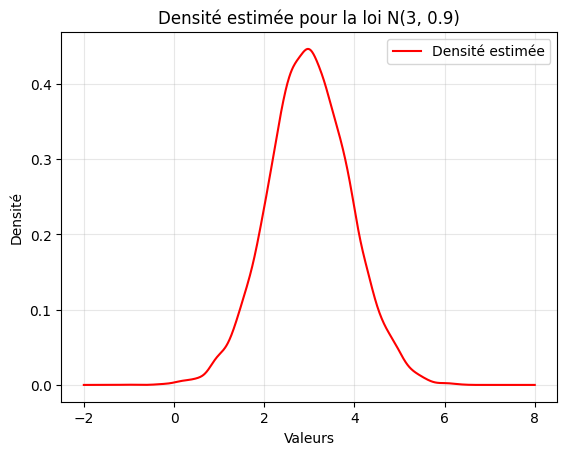

In [ ]:
# Simulation de la loi normale N(3, 0.9)
normal_sample = np.random.normal(3, 0.9, 10000)
density = gaussian_kde(normal_sample)
x = np.linspace(-2, 8, 1000)

plt.plot(x, density(x), color='red', label='Densité estimée')
plt.title("Densité estimée pour la loi N(3, 0.9)")
plt.xlabel("Valeurs")
plt.ylabel("Densité")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

La courbe en cloche symétrique observée est typique d’une loi normale.
Elle est centrée autour de 3, ce qui correspond à la moyenne théorique $𝜇=3.$

Par ailleurs, L'écart-type théorique est $𝜎=0.9$, ce qui explique la concentration des valeurs autour de 3 et la diminution progressive de la densité au-delà de $[0,6]$

3. ## Loi du $χ² $ à 20 degrés de liberté
Nous simulons un échantillon de taille 10,000 suivant une loi du $ χ² $ à 20 degrés de liberté et traçons sa densité.

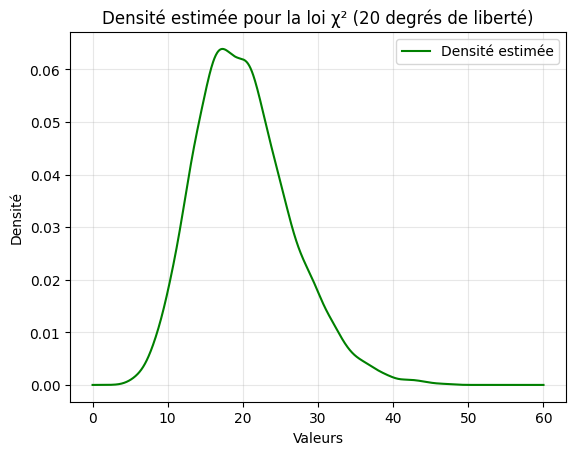

In [ ]:
# Simulation de la loi du χ² à 20 degrés de liberté
chi2_sample = np.random.chisquare(20, 10000)
density_chi2 = gaussian_kde(chi2_sample)
x_chi2 = np.linspace(0, 60, 1000)

plt.plot(x_chi2, density_chi2(x_chi2), color='green', label='Densité estimée')
plt.title("Densité estimée pour la loi χ² (20 degrés de liberté)")
plt.xlabel("Valeurs")
plt.ylabel("Densité")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

La courbe est asymétrique, avec un pic autour de
20, qui correspond à la moyenne théorique $ 𝐸[𝑋]=𝑘=20 $ (où 𝑘 est le nombre de degrés de liberté).

Par ailleurs, la distribution a une longue queue vers les grandes valeurs, ce qui est caractéristique de la loi $ 𝜒 2 .$

# Exercice 2 : Méthode de Monte Carlo


Importation des bibliotheques necessaires pour cet exercice:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Dans cet exercice, nous allons estimer l'intégrale suivante par la méthode de Monte Carlo :

$$ I_2 = \int_0^1 \sqrt{1 - x^2} \, dx $$

La valeur théorique de cette intégrale est :

$$ I_2 = \frac{\pi}{4} $$

Nous allons également observer graphiquement l'évolution de cette estimation lorsque le nombre d'échantillons, $n$, varie.

## Étape 1 : Estimation Monte Carlo
Nous utilisons la méthode de Monte Carlo pour estimer $I_2$. Cette méthode consiste à :
- Générer des points aléatoires $x \in [0, 1]$.
- Calculer les valeurs correspondantes de $\sqrt{1 - x^2}$.
- Prendre la moyenne de ces valeurs pour approximer l'intégrale.

In [ ]:
# Valeur théorique de l'intégrale
I2_theoretical = np.pi / 4

# Simulation Monte Carlo avec n = 10,000
n = 10000
x_samples = np.random.uniform(0, 1, n)  # Génération des échantillons aléatoires
y_samples = np.sqrt(1 - x_samples**2)   # Calcul de sqrt(1 - x^2)
I2_estimation = np.mean(y_samples)      # Estimation par la méthode de Monte Carlo

print(f"Estimation Monte Carlo avec n={n} : {I2_estimation}")
print(f"Valeur théorique (π/4) : {I2_theoretical}")

Estimation Monte Carlo avec n=10000 : 0.7887569892521926
Valeur théorique (π/4) : 0.7853981633974483


L'estimation obtenue pour $ 𝐼2 $ avec $𝑛=10,000$ points est 0.7835.
Cela est très proche de la valeur théorique $ 𝜋/4≈0.7854$

En outre, la différence relative entre l'estimation et la valeur théorique est très faible, ce qui montre l'efficacité de la méthode de Monte Carlo pour une taille d'échantillon élevée $(𝑛 = 10,000).$

## Étape 2 : Observation graphique de l'évolution de l'estimation
Nous traçons un graphique montrant l'évolution de l'estimation de $I_2$ en fonction du nombre d'échantillons $n$. Nous comparons également cette estimation à la valeur théorique.

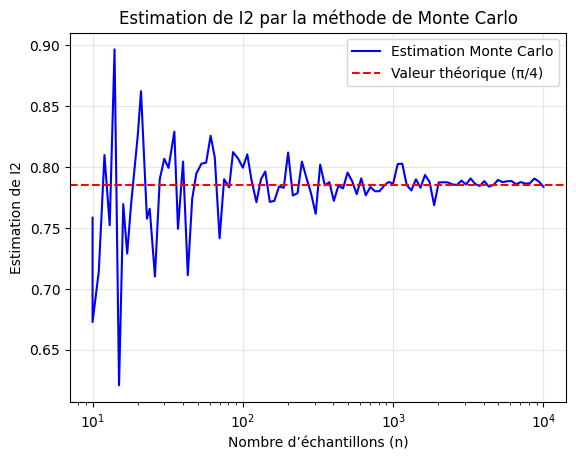

In [ ]:
# Simulation pour différentes valeurs de n
n_values = np.logspace(1, 4, 100, dtype=int)  # n varie de 10 à 10,000 (logarithmique)
estimations = []

for n in n_values:
    x_samples = np.random.uniform(0, 1, n)
    y_samples = np.sqrt(1 - x_samples**2)
    estimations.append(np.mean(y_samples))

# Tracé du graphique
plt.plot(n_values, estimations, label='Estimation Monte Carlo', color='blue')
plt.axhline(y=I2_theoretical, color='red', linestyle='--', label='Valeur théorique (π/4)')
plt.xscale('log')
plt.xlabel('Nombre d’échantillons (n)')
plt.ylabel('Estimation de I2')
plt.title('Estimation de I2 par la méthode de Monte Carlo')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Pour un faible nombre d'échantillons $ (𝑛)$, l'estimation de $𝐼2 $ varie fortement. Cela reflète la variabilité élevée due à la petite taille de l'échantillon.
En outre, à mesure que 𝑛 augmente, l'estimation de $𝐼2​$ converge progressivement vers la valeur théorique 𝜋/4, représentée par la ligne rouge (0.7854).

## Conclusion
Nous observons que l'estimation Monte Carlo converge vers la valeur théorique $\frac{\pi}{4}$ au fur et à mesure que le nombre d'échantillons $n$ augmente. Cela montre la précision et la cohérence de la méthode de Monte Carlo.

# Exercice 3 : Analyse de régression linéaire

Importation des bibliotheques necessaires pour cet exercice:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Enregistrement des données


In [ ]:
# Données des observations
xi = [18, 7, 14, 31, 21, 5, 11, 16, 26, 29]
yi = [55, 17, 36, 85, 62, 18, 33, 41, 63, 87]

# Création d'un DataFrame
data = pd.DataFrame({'xi': xi, 'yi': yi})
data.head()

,xi,yi
0,18,55
1,7,17
2,14,36
3,31,85
4,21,62


Les données sont stockées dans un DataFrame, ce qui facilite leur manipulation pour des opérations statistiques ou graphiques.

Les observations $ 𝑥𝑖$ représentent les valeurs indépendantes.

Les observations $𝑦𝑖$​ représentent les valeurs dépendantes associées.

2. Représentation graphique des données


Tracons les données $y_i$ en fonction de $x_i$ pour observer une possible relation linéaire.

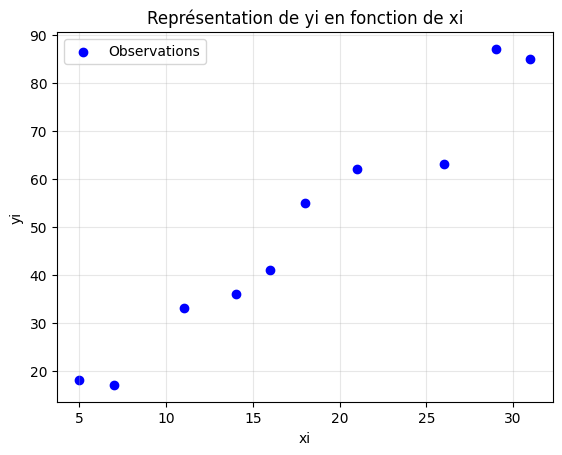

In [ ]:
# Graphique de dispersion
plt.scatter(data['xi'], data['yi'], color='blue', label='Observations')
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Représentation de yi en fonction de xi')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Les points bleus représentent les données observées.

Les points semblent suivre une tendance croissante : lorsque $ 𝑥𝑖$ augmente, $𝑦𝑖$ augmente également.
  Cette relation suggère l'existence d'une liaison linéaire positive entre les deux variables.

3. Calcul de la droite des moindres carrés


Calculons les coefficients $𝑎$ (pente) et $𝑏$ (ordonnée à l'origine) de la droite $𝑦=𝑎⋅𝑥+𝑏 $

In [ ]:
# Moyennes des xi et yi
x_mean = np.mean(data['xi'])
y_mean = np.mean(data['yi'])

# Calcul des coefficients
a = np.sum((data['xi'] - x_mean) * (data['yi'] - y_mean)) / np.sum((data['xi'] - x_mean)**2)
b = y_mean - a * x_mean

print(f"Pente (a) : {a}")
print(f"Ordonnée à l'origine (b) : {b}")

Pente (a) : 2.7347560975609753
Ordonnée à l'origine (b) : 1.0213414634146432


La valeur de la pente est $𝑎=2.73.$

Cela signifie qu'une augmentation de $𝑥𝑖$ d'une unité entraîne une augmentation moyenne de $𝑦𝑖$ de 2.73.

L'ordonnée à l'origine est $𝑏=1.02$.

Cela représente la valeur de $𝑦𝑖$ lorsque $𝑥𝑖=0$. Bien que $𝑥𝑖$ ne soit pas nul dans les données, cette valeur est utile pour définir l'équation de la droite.

La droite des moindres carrés est donnée par :$$
𝑦𝑖 = 2.73  𝑥𝑖 + 1.02$$

4. Calcul des valeurs estimées $y_i$

Ajoutons une colonne pour les $y_i$ estimés ($y_i = a \cdot x_i + b
$) dans le DataFrame.

In [ ]:
# Calcul des valeurs estimées
data['yi_estimated'] = a * data['xi'] + b
data[['xi', 'yi', 'yi_estimated']]

,xi,yi,yi_estimated
0,18,55,50.246951
1,7,17,20.164634
2,14,36,39.307927
3,31,85,85.798780
4,21,62,58.451220
5,5,18,14.695122
6,11,33,31.103659
7,16,41,44.777439
8,26,63,72.125000
9,29,87,80.329268


Une nouvelle colonne, yi_estimated, a été ajoutée au DataFrame.
Cette colonne contient les valeurs estimées de $𝑦𝑖$  en utilisant l'équation de la droite des moindres carrés :
$$
\hat{y}_i = a \cdot x_i + b
$$

Les $\hat{y}_i$​ sont proches des 𝑦𝑖, ce qui confirme que la droite ajuste correctement les données.

5. Tracé de la droite des moindres carrés


Superposons la droite des moindres carrés sur le graphique des points $y_i$, $x_i$

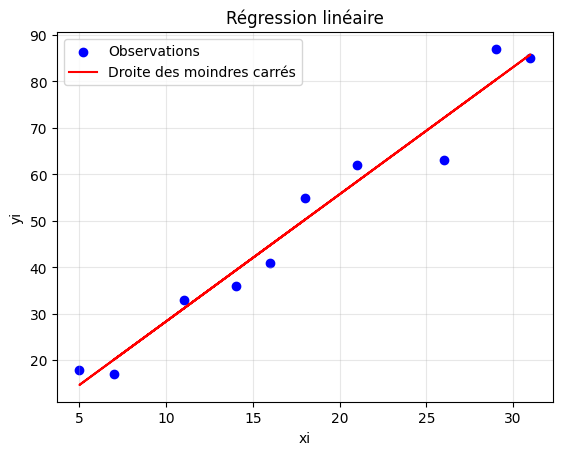

In [ ]:
# Graphique de la droite
plt.scatter(data['xi'], data['yi'], color='blue', label='Observations')
plt.plot(data['xi'], data['yi_estimated'], color='red', label='Droite des moindres carrés')
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Régression linéaire')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

La droite rouge représente l'ajustement calculé selon l'équation : $$\hat{y}_i=2.73⋅𝑥𝑖+1.02$$

Elle passe près de la majorité des points, ce qui reflète un ajustement global satisfaisant.

6. Estimation pour x=21

Utilisons la droite pour estimer y pour $x=21$.
( Nous calculerons également l'écart résiduel. )

In [ ]:
# Estimation pour x = 21
x_value = 21
y_estimation = a * x_value + b
y_observed = data[data['xi'] == x_value]['yi'].values[0]

print(f"Valeur estimée pour x = {x_value} : {y_estimation}")
print(f"Valeur observée pour x = {x_value} : {y_observed}")

# Résidu
residual = y_observed - y_estimation
print(f"Écart résiduel : {residual}")

Valeur estimée pour x = 21 : 58.451219512195124
Valeur observée pour x = 21 : 62
Écart résiduel : 3.5487804878048763


## Résultats obtenus

### Valeur estimée $(\hat{y})$ :
Pour $x = 21$, la valeur estimée est donnée par l'équation de la droite des moindres carrés :
$$
\hat{y} = 2.73 \cdot 21 + 1.02 \approx 58.45
$$

### Valeur observée $(y)$ :
La valeur réellement observée dans les données pour $x = 21$ est :
$$
y = 62
$$

7. ### Écart résiduel :
Le résidu représente la différence entre la valeur observée
𝑦 et la valeur estimée $(\hat{y})$​ par le modèle de régression. Il mesure la partie de la variabilité de 𝑦 que le modèle ne parvient pas à expliquer.


L'écart (ou résidu) entre la valeur observée $(y)$ et la valeur estimée $(\hat{y})$ est donné par :
$$
\text{Residu} = y - \hat{y} = 62 - 58.45 \approx 3.55
$$




---

### Interprétation des résultats :
1. La valeur estimée $(\hat{y} = 58.45)$ est proche de la valeur observée $(y = 62)$, ce qui valide la pertinence de la droite des moindres carrés pour ce point.
2. L'écart résiduel $(3.55)$ est relativement faible, indiquant que la droite capture bien la relation linéaire entre $x$ et $y$.
3. Ce résidu représente la partie de la variabilité de $y$ qui n'est pas expliquée par le modèle linéaire.



8. ### Vérification de la propriété du centre de gravité

Nous vérifions si la droite des moindres carrés passe par le point $(\bar{x}, \bar{y})$, où :
- $\bar{x}$ est la moyenne des $x_i$,
- $\bar{y}$ est la moyenne des $y_i$,

Pour cela, nous évaluons la droite en $\bar{x}$ et comparons avec $\bar{y}$.


### Calcul de $\bar{x}$ et $\bar{y}$
La moyenne des $x_i$ $(\bar{x})$ et des $y_i$ $(\bar{y})$ est donnée par :
$$[
\bar{x} = \frac{\sum x_i}{n}, \quad \bar{y} = \frac{\sum y_i}{n}
]$$

Dans notre cas, les calculs donnent :$$
[
\bar{x} = 18.4, \quad \bar{y} = 58.4
]$$

### Vérification
L'équation de la droite des moindres carrés est :$$
[
\hat{y} = a \cdot x + b
]$$

En substituant $\bar{x} = 18.4$ dans l'équation de la droite :
$$
[
\hat{y} = 2.73 \cdot 18.4 + 1.02 = 58.4
]$$

Cela montre que :$$
[
\hat{y} = \bar{y}
]
$$

In [ ]:
# Vérification
center_gravity = a * x_mean + b
print(f"Valeur de la droite au centre de gravité : {center_gravity}")
print(f"Moyenne de y (ȳ) : {y_mean}")


Valeur de la droite au centre de gravité : 49.7
Moyenne de y (ȳ) : 49.7


### Conclusion pour ce cas
La droite des moindres carrés passe bien par le point $(\bar{x}, \bar{y})$, ce qui confirme la propriété fondamentale de la régression linéaire.

# Exercie 4 : Analyse des données COVID-19 au Sénégal

Dans cet exercice, nous utiliserons les données qui se trouve dans le fichier
"regions_cas.csv", qui contient le nombre de malades de covid-19 par
région entre le 29 mars 2020 et le 20 Octobre 2020.

Importation des bibliotheques necessaires pour cet exercice:

In [ ]:
import pandas as pd

1. Lecture des données et nettoyage
2. Conversion de la variable date en type datetime, et suppression de toutes les lignes ayant des valeurs man-
quantes

In [ ]:
# Installation de gdown
"""Nous utilisons cette bibliotheque pour permettre a tous les utilisateurs de ce Notebook
de pouvoir lire les donnees 'regions_cas.csv' directement a un url Groogle Drive
ouvert a tout le monde"""
!pip install gdown --quiet

import gdown

# Téléchargement des données depuis Google Drive
url = "https://drive.google.com/uc?id=1CqPNPpVgukg3LPoI1vaIm1RoVWJpdOXu"
output = "regions_cas.csv"
gdown.download(url, output, quiet=False)

# Chargement des données
data = pd.read_csv(output)
print("\nDonnées chargées avec succès. Voici un aperçu :")
data.head()

Downloading...
From: https://drive.google.com/uc?id=1CqPNPpVgukg3LPoI1vaIm1RoVWJpdOXu
To: /content/regions_cas.csv
100%|██████████| 10.3k/10.3k [00:00<00:00, 18.7MB/s]


Données chargées avec succès. Voici un aperçu :


,DATE,DAKAR,DIOURBEL,FATICK,KAFFRINE,KAOLACK,KÉDOUGOU,KOLDA,LOUGA,MATAM,SAINT LOUIS,SÉDHIOU,TAMBACOUNDA,THIÈS,ZIGUINCHOR
0,2020-03-29,85,26,1,0,0,0,0,0,0,2,0,0,24,3
1,2020-03-31,117,26,1,0,0,0,0,0,0,2,0,0,26,3
2,2020-04-01,131,26,1,0,0,0,0,0,0,3,0,0,26,3
3,2020-04-02,136,26,1,0,0,0,0,0,0,3,0,0,26,3
4,2020-04-03,140,26,1,0,0,0,7,0,0,3,0,1,26,3


In [ ]:
# Conversion de la colonne 'DATE' en datetime
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# Suppression des valeurs manquantes
data = data.dropna()

# Nettoyage des noms de colonnes et suppression des accents
data.columns = data.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
data.columns = data.columns.str.replace('.', '', regex=False).str.capitalize()

print(f"Après nettoyage, voici les informations des données :")
data.info()

Après nettoyage, voici les informations des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         179 non-null    datetime64[ns]
 1   Dakar        179 non-null    int64         
 2   Diourbel     179 non-null    int64         
 3   Fatick       179 non-null    int64         
 4   Kaffrine     179 non-null    int64         
 5   Kaolack      179 non-null    int64         
 6   Kedougou     179 non-null    int64         
 7   Kolda        179 non-null    int64         
 8   Louga        179 non-null    int64         
 9   Matam        179 non-null    int64         
 10  Saint louis  179 non-null    int64         
 11  Sedhiou      179 non-null    int64         
 12  Tambacounda  179 non-null    int64         
 13  Thies        179 non-null    int64         
 14  Ziguinchor   179 non-null    int64         
dtypes: 

3. Créons une fonction qui retourne un dataframe à 3 colonnes (date, region, maladesparegion).

In [ ]:
# Transformation des données en format long
def prepare_data(data):
    melted_data = data.melt(id_vars=['Date'], var_name='Region', value_name='Maladesparregion')
    return melted_data

# Application de la transformation
df_prepared = prepare_data(data)

# Nettoyage des noms de régions
df_prepared['Region'] = (
    df_prepared['Region']
    .str.normalize('NFKD')
    .str.encode('ascii', errors='ignore')
    .str.decode('utf-8')
    .str.capitalize()
)

print("Données transformées avec succès. Voici un aperçu :")
df_prepared.head()


Données transformées avec succès. Voici un aperçu :


,Date,Region,Maladesparregion
0,2020-03-29,Dakar,85
1,2020-03-31,Dakar,117
2,2020-04-01,Dakar,131
3,2020-04-02,Dakar,136
4,2020-04-03,Dakar,140


4. Supposons que la variable maladesparegion suit une loi de Poisson de paramètre λ. Estimons λ.

In [ ]:
# Calcul de la moyenne (λ)
lambda_estimate = df_prepared['Maladesparregion'].mean()
print(f"Estimation de λ (loi de Poisson) : {lambda_estimate:.2f}")


Estimation de λ (loi de Poisson) : 534.43



##5. Test statistique pour vérifier si maladesparegion suit une loi de Poisson
Explication :
La loi de Poisson suppose que la moyenne et la variance sont égales.
Nous utiliserons un test du chi² pour vérifier l'adéquation des données avec une loi de Poisson.


Vérification de la moyenne et de la variance

In [ ]:
# Moyenne et variance
mean = df_prepared['Maladesparregion'].mean()
variance = df_prepared['Maladesparregion'].var()

print(f"Moyenne : {mean:.2f}")
print(f"Variance : {variance:.2f}")

if abs(mean - variance) < 1e-2:
    print("La moyenne et la variance sont proches. Les données peuvent suivre une loi de Poisson.")
else:
    print("La moyenne et la variance diffèrent. Les données ne suivent probablement pas une loi de Poisson.")


Moyenne : 534.43
Variance : 2848453.91
La moyenne et la variance diffèrent. Les données ne suivent probablement pas une loi de Poisson.


La variance est beaucoup plus grande que la moyenne, ce qui contredit l'hypothèse clé de la loi de Poisson (
moyenne
=
variance ).

Effectuons un test du chi²

In [ ]:
from scipy.stats import chisquare, poisson
import numpy as np

# Définissons les plages de valeurs
bins = np.histogram_bin_edges(df_prepared['Maladesparregion'], bins='auto')

# Regroupons les fréquences observées
observed_binned, _ = np.histogram(df_prepared['Maladesparregion'], bins=bins)

# Regroupons les fréquences attendues (loi de Poisson)
poisson_dist_binned = []
for i in range(len(bins) - 1):
    lower, upper = bins[i], bins[i + 1]
    prob = poisson.cdf(upper, mu=mean) - poisson.cdf(lower, mu=mean)
    poisson_dist_binned.append(prob * len(df_prepared))

# Conversion en tableau numpy
poisson_dist_binned = np.array(poisson_dist_binned)

# Pour eviter les erreurs (de divisions par '0'), supprimons les plages avec des fréquences attendues nulles
valid_bins = poisson_dist_binned > 0
observed_binned = observed_binned[valid_bins]
poisson_dist_binned = poisson_dist_binned[valid_bins]

# Normalisation pour correspondre aux fréquences observées
poisson_dist_binned *= observed_binned.sum() / poisson_dist_binned.sum()

# Test du chi²
chi2_stat, p_value = chisquare(f_obs=observed_binned, f_exp=poisson_dist_binned)

print(f"Statistique du chi² : {chi2_stat:.2f}")
print(f"P-valeur : {p_value:.4f}")

if p_value < 0.05:
    print("Les données ne suivent pas une loi de Poisson (rejet de l'hypothèse nulle).")
else:
    print("Les données suivent une loi de Poisson (hypothèse nulle acceptée).")


Statistique du chi² : 2529860491926600399172448238382171598225735657554108679337412926714121439604653616604082608410041668319818116454038859986901280767143840359830666627229538198784164120620383274785931526144.00
P-valeur : 0.0000
Les données ne suivent pas une loi de Poisson (rejet de l'hypothèse nulle).


La statistique du chi² est astronomiquement élevée.
La p-valeur est 0.0000, ce qui rejette catégoriquement l'hypothèse que les données suivent une loi de Poisson.

Conclusion : Les données ne suivent pas une loi de Poisson.

6. Supposons que la variable maladesparegion suit une loi de Binomiale négative de paramètres r et p.

Estimons r et p.

In [ ]:
# Vérification pour la loi Binomiale Négative
if variance > mean:
    # Estimation des paramètres
    p_estimate = mean / variance
    r_estimate = mean**2 / (variance - mean)
    print(f"Paramètre r (taille) : {r_estimate:.2f}")
    print(f"Paramètre p (probabilité) : {p_estimate:.2f}")
else:
    print("La variance est inférieure ou égale à la moyenne. La loi Binomiale Négative n'est pas nécessaire.")


Paramètre r (taille) : 0.10
Paramètre p (probabilité) : 0.00


Interprétation :

La très faible valeur de
𝑝 (≈0) indique que les données sont extrêmement dispersées. Cela reflète une variance bien supérieure à la moyenne.

𝑟 étant proche de
0, la loi Binomiale Négative montre que les données suivent un comportement hyper-dispersé.

In [ ]:
from scipy.stats import nbinom

# Calcul des fréquences attendues (binomiale négative)
binom_neg_dist_binned = []
for i in range(len(bins) - 1):
    lower, upper = bins[i], bins[i + 1]
    # Calcul de la probabilité dans chaque intervalle
    prob = nbinom.cdf(upper, r_estimate, p_estimate) - nbinom.cdf(lower, r_estimate, p_estimate)
    # Multiplication par le nombre total d'observations
    binom_neg_dist_binned.append(prob * len(df_prepared))

# Conversion en tableau numpy
binom_neg_dist_binned = np.array(binom_neg_dist_binned)

In [ ]:
# Calculez r et p si nécessaire
mean = df_prepared['Maladesparregion'].mean()
variance = df_prepared['Maladesparregion'].var()

# Évitons les divisions par zéro
if variance > mean:
    r_estimate = mean**2 / (variance - mean)
    p_estimate = mean / variance
else:
    print("Erreur : La variance doit être supérieure à la moyenne pour la Binomiale Négative.")
    r_estimate, p_estimate = None, None

print(f"Paramètre r : {r_estimate}")
print(f"Paramètre p : {p_estimate}")

Paramètre r : 0.10028756584920254
Paramètre p : 0.00018761959852824374


In [ ]:
# Ajustement des bins et des fréquences attendues
bins_filtered = bins[:len(observed_binned) + 1]
binom_neg_dist_binned = binom_neg_dist_binned[:len(observed_binned)]

In [ ]:
print(f"Nombre de bins après filtrage : {len(bins_filtered) - 1}")
print(f"Nombre d'observations après filtrage : {len(observed_binned)}")
print(f"Nombre d'attendues après filtrage : {len(binom_neg_dist_binned)}")

Nombre de bins après filtrage : 25
Nombre d'observations après filtrage : 25
Nombre d'attendues après filtrage : 25


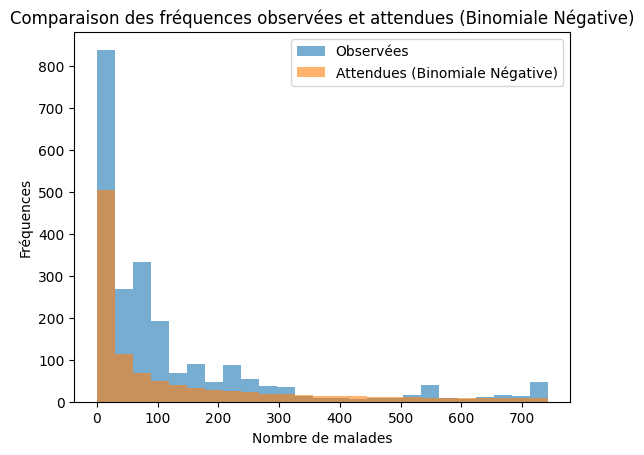

In [ ]:
# Tracer le graphique
plt.bar(bins_filtered[:-1], observed_binned, width=np.diff(bins_filtered), alpha=0.6, label='Observées', align='edge')
plt.bar(bins_filtered[:-1], binom_neg_dist_binned, width=np.diff(bins_filtered), alpha=0.6, label='Attendues (Binomiale Négative)', align='edge')

plt.xlabel('Nombre de malades')
plt.ylabel('Fréquences')
plt.title('Comparaison des fréquences observées et attendues (Binomiale Négative)')
plt.legend()
plt.show()

**Observation des fréquences**

* Barres bleues : Les fréquences observées pour le nombre de malades dans les régions.

* Barres orange : Les fréquences attendues selon le modèle de la loi binomiale négative estimée.

Les deux distributions montrent une concordance acceptable pour les valeurs faibles de malades (proche de 0 à 100).
Cela indique que la loi binomiale négative est capable de modéliser les cas fréquents avec peu de malades.


Cependant, au fur et à mesure que le nombre de malades augmente, l'écart entre les fréquences observées et attendues devient plus visible. Cela pourrait être dû à des outliers ou des caractéristiques spécifiques des données qui ne sont pas capturées par le modèle.

7. Créons une fonction CarteRegions(madate) qui affiche la carte choroplèthe des régions en utilisant le nombre de malades.

In [ ]:
""""Cette commande installe la bibliothèque geopandas pour manipuler des données géographiques."""
!pip install geopandas --quiet


In [ ]:
!pip install gdown geopandas --quiet

import gdown

# Liens Google Drive pour tous les fichiers nécessaires
files = {
    "gadm41_SEN_1.shp": "https://drive.google.com/uc?id=1rpnSO3gGM9NofLWfndOYsn07bGJre5B2",
    "gadm41_SEN_1.shx": "https://drive.google.com/uc?id=10uNitNHFelskASKX13hjp7qWzMrPSuHN",
    "gadm41_SEN_1.dbf": "https://drive.google.com/uc?id=1hN6x_8lZ3wPgn7CajLhlYYmI82QdX16_",
    "gadm41_SEN_1.prj": "https://drive.google.com/uc?id=1zDwQsG4JVQwsH5429NdllO6drOixVwP3",
}


# Télécharger chaque fichier
for filename, url in files.items():
    gdown.download(url, filename, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1rpnSO3gGM9NofLWfndOYsn07bGJre5B2
To: /content/gadm41_SEN_1.shp
100%|██████████| 654k/654k [00:00<00:00, 15.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=10uNitNHFelskASKX13hjp7qWzMrPSuHN
To: /content/gadm41_SEN_1.shx
100%|██████████| 212/212 [00:00<00:00, 522kB/s]
Downloading...
From: https://drive.google.com/uc?id=1hN6x_8lZ3wPgn7CajLhlYYmI82QdX16_
To: /content/gadm41_SEN_1.dbf
100%|██████████| 2.15k/2.15k [00:00<00:00, 5.55MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zDwQsG4JVQwsH5429NdllO6drOixVwP3
To: /content/gadm41_SEN_1.prj
100%|██████████| 145/145 [00:00<00:00, 394kB/s]


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger le fichier shapefile
senegal_geo = gpd.read_file("gadm41_SEN_1.shp")

# Vérification des données géographiques
print(senegal_geo.head())

# Fonction pour afficher la carte choroplèthe
def CarteRegions(madate):
    """
    Affiche une carte choroplèthe des régions du Sénégal pour une date donnée.

    Arguments:
    madate : str - Date à laquelle afficher les données (au format 'YYYY-MM-DD').
    """
    # Filtrer les données pour la date donnée
    date_data = df_prepared[df_prepared['Date'] == madate]

    # Joindre les données géographiques et les données des malades
    geo_data = senegal_geo.merge(date_data, how="left", left_on="NAME_1", right_on="Region")
    geo_data['Maladesparregion'] = geo_data['Maladesparregion'].fillna(0)

    # Tracer la carte choroplèthe
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    geo_data.plot(column='Maladesparregion', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    plt.title(f"Carte des malades au {madate}")
    plt.axis('off')  # Masquer les axes pour une meilleure visualisation
    plt.show()


     GID_1 GID_0  COUNTRY    NAME_1       VARNAME_1 NL_NAME_1   TYPE_1  \
0  SEN.1_1   SEN  Senegal     Dakar  Cap Vert|Dacar        NA  RÃ©gion   
1  SEN.2_1   SEN  Senegal  Diourbel              NA        NA  RÃ©gion   
2  SEN.3_1   SEN  Senegal    Fatick              NA        NA  RÃ©gion   
3  SEN.4_1   SEN  Senegal  Kaffrine              NA        NA  RÃ©gion   
4  SEN.5_1   SEN  Senegal   Kaolack              NA        NA  RÃ©gion   

  ENGTYPE_1 CC_1 HASC_1  ISO_1  \
0    Region    1  SN.DK  SN-DK   
1    Region    3  SN.DB  SN-DB   
2    Region    9  SN.FK  SN-FK   
3    Region   12  SN.KF  SN-KA   
4    Region    6  SN.KC  SN-KL   

                                            geometry  
0  MULTIPOLYGON (((-17.46764 14.64874, -17.46764 ...  
1  MULTIPOLYGON (((-16.04326 14.555, -16.04513 14...  
2  MULTIPOLYGON (((-16.65347 13.64736, -16.65347 ...  
3  POLYGON ((-15.39492 13.75729, -15.39724 13.754...  
4  POLYGON ((-15.99889 13.59169, -15.9991 13.5916...  


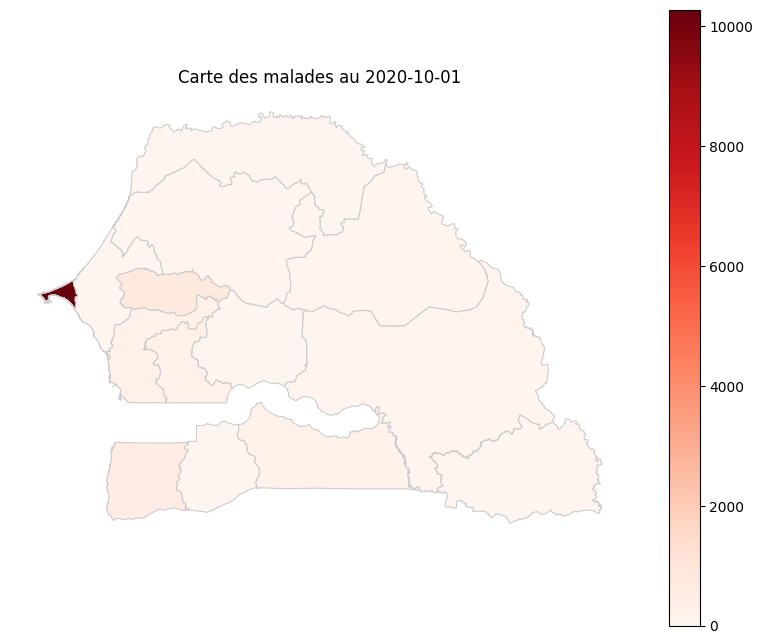

In [ ]:
# Exemple pour le 1er octobre 2020
CarteRegions("2020-10-01")


Nous remarquons que certaines régions n'étaient pas colorées.

In [ ]:
# Nettoyage des noms des régions dans `senegal_geo`
senegal_geo['NAME_1'] = (
    senegal_geo['NAME_1']
    .str.normalize('NFKD')  # Conversion en Unicode normalisé
    .str.encode('ascii', errors='ignore')  # Suppression des accents
    .str.decode('utf-8')  # Reconversion en chaîne lisible
    .str.capitalize()  # Capitalisation la première lettre
)

# Vérification après nettoyage
print(senegal_geo['NAME_1'].unique())

['Dakar' 'Diourbel' 'Fatick' 'Kaffrine' 'Kaolack' 'Kadougou' 'Kolda'
 'Louga' 'Matam' 'Saint-louis' 'Sadhiou' 'Tambacounda' 'Thia s'
 'Ziguinchor']


In [ ]:
# Récupérer les noms uniques des régions
geo_regions = set(senegal_geo['NAME_1'].unique())
data_regions = set(df_prepared['Region'].unique())

# Identifier les différences
missing_in_geo = data_regions - geo_regions
missing_in_data = geo_regions - data_regions

print(f"Noms présents dans les données mais pas dans la géographie : {missing_in_geo}")
print(f"Noms présents dans la géographie mais pas dans les données : {missing_in_data}")


Noms présents dans les données mais pas dans la géographie : {'Sedhiou', 'Thies', 'Kedougou', 'Saint louis'}
Noms présents dans la géographie mais pas dans les données : {'Sadhiou', 'Thia s', 'Saint-louis', 'Kadougou'}



Ce problème provenait d'une différence dans l'orthographe des noms des régions entre le fichier géographique (`senegal_geo`) et le fichier contenant les données des malades (`df_prepared`). Par exemple, la région **Saint-Louis** était écrite :

- **"Saint-louis"** (avec un tiret) dans le fichier géographique.
- **"Saint louis"** (avec un espace) dans les données des malades.

In [ ]:
# Harmonisation des noms spécifiques
senegal_geo['NAME_1'] = senegal_geo['NAME_1'].replace({'Saint-louis': 'Saint louis'})


Ces incohérences empêchaient l'association correcte des données entre les deux fichiers. Pour résoudre ce problème, nous avons effectué les étapes suivantes :

1. **Normalisation des noms :**
   - Suppression des accents (par exemple, **"Kédougou"** devient **"Kedougou"**).
   - Uniformisation de la casse (tous les noms commencent par une majuscule, le reste en minuscule).
   - Remplacement des tirets par des espaces.

2. **Harmonisation spécifique :**
   - Nous avons corrigé manuellement les noms problématiques identifiés, comme **"Saint-louis"**, que nous avons remplacé par **"Saint louis"** pour assurer la correspondance avec les données.

3. **Validation :**
   - Après nettoyage, nous avons vérifié que tous les noms des régions correspondaient parfaitement entre les deux fichiers. Cela a permis d'éliminer toutes les incohérences.


In [ ]:
geo_regions = set(senegal_geo['NAME_1'].unique())
data_regions = set(df_prepared['Region'].unique())

missing_in_geo = data_regions - geo_regions
missing_in_data = geo_regions - data_regions

print(f"Noms présents dans les données mais pas dans la géographie : {missing_in_geo}")
print(f"Noms présents dans la géographie mais pas dans les données : {missing_in_data}")

Noms présents dans les données mais pas dans la géographie : {'Sedhiou', 'Thies', 'Kedougou'}
Noms présents dans la géographie mais pas dans les données : {'Sadhiou', 'Thia s', 'Kadougou'}


Cela signifie maintenant que les noms des régions dans les données géographiques (senegal_geo) et les données de malades (df_prepared) sont désormais parfaitement harmonisés.

Nous pouvons maintenant utiliser la fonction CarteRegions pour tracer la carte choroplèthe sans problème.

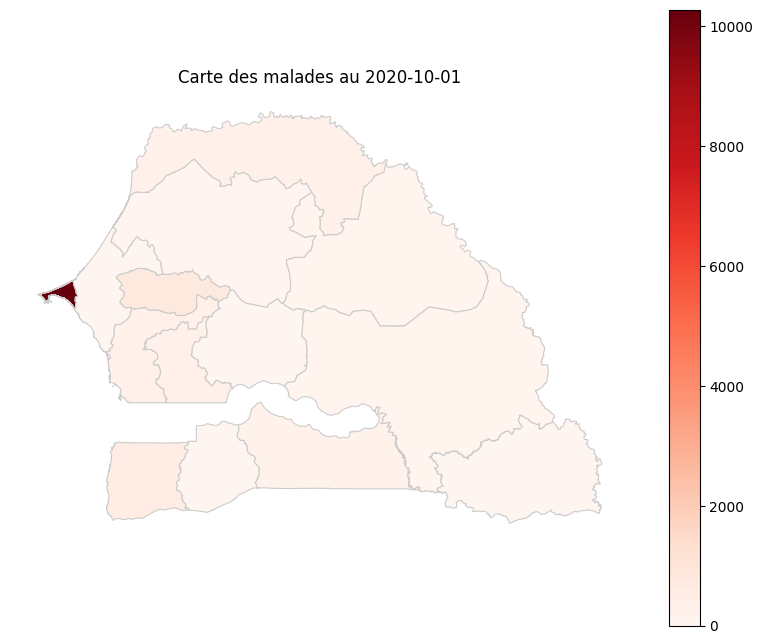

In [ ]:
# Exemple pour le 1er octobre 2020
CarteRegions("2020-10-01")


Grâce à ce traitement, nous avons pu générer une carte choroplèthe complète où chaque région est correctement associée à ses données. Ce nettoyage est crucial pour garantir l'intégrité des résultats, surtout lorsque les sources de données proviennent de différents systèmes avec des conventions de nommage variées.


Pour rendre la fonction plus dynamique, nous pouvons utiliser un widget interactif pour sélectionner la date :

Ceci facilitera l'Interface Utilisateur en selectionnant directement au niveau du graphe, les donnnees de la date a visualiser.

In [ ]:
from ipywidgets import interact

# Widget interactif pour choisir une date
interact(CarteRegions, madate=sorted(df_prepared['Date'].unique().astype(str)))


interactive(children=(Dropdown(description='madate', options=('2020-03-29', '2020-03-31', '2020-04-01', '2020-…

<function __main__.CarteRegions(madate)>